In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so
from scipy import stats

In [2]:
samples = ["FN1_14084_TAGCTT", "FN2_14085_GGCTAC", "FN3_14086_CTTGTA", "FN4_14087_GTGAAA", "FW1_14080_ATCACG", "FW2_14081_ACAGTG", "FW3_14082_GCCAAT", "FW4_14083_ACTTGA"]

In [3]:
def piekne_wykresy(samples, measure):
    df_mean = []
    for i in samples:
        read_file = pd.read_csv(f'Popoolation1\\variance_sliding_{measure}\{i}.{measure}', sep='\t', header=None, names=['ref_chrom', 
                                                                                                                        'window_pos', 
                                                                                                                        'num_of_SNP',
                                                                                                                        'coverage', 
                                                                                                                        f'measure_{measure}'])

        #change na to NaN
        read_file = read_file.replace('na', np.NaN)

        #droping na values
        read_file.dropna(inplace=True)

        read_file[f'measure_{measure}'] = read_file[f'measure_{measure}'].astype(float)


        mean = read_file[f'measure_{measure}'].mean()
        name = i.split('_')[0]
        df_mean.append([name, round(mean, 4)])

    df_mean = pd.DataFrame(df_mean, columns=['sample', f'measure_{measure}'])
    df_mean['type'] = df_mean['sample'].str[:2]
    df_mean.set_index('sample', inplace=True)

    return df_mean

In [4]:
df_pi = piekne_wykresy(samples, 'pi')
df_theta = piekne_wykresy(samples, 'theta')

In [5]:
df_pi

,measure_pi,type
sample,,
FN1,0.0133,FN
FN2,0.0142,FN
FN3,0.0129,FN
FN4,0.0150,FN
FW1,0.0111,FW
FW2,0.0132,FW
FW3,0.0123,FW
FW4,0.0119,FW


In [6]:
df_theta

,measure_theta,type
sample,,
FN1,0.0124,FN
FN2,0.0136,FN
FN3,0.0123,FN
FN4,0.0143,FN
FW1,0.0105,FW
FW2,0.0128,FW
FW3,0.0116,FW
FW4,0.0112,FW


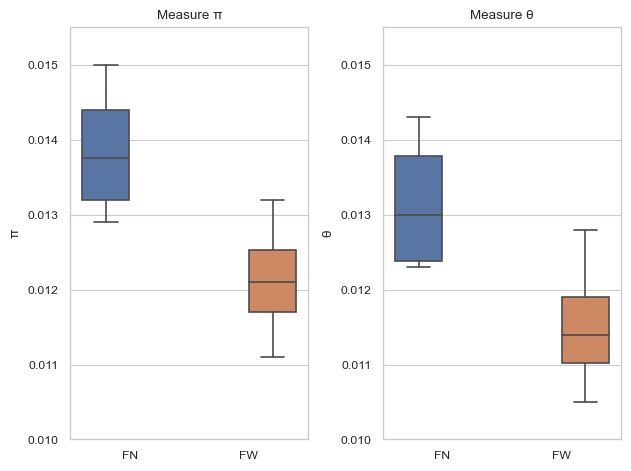

In [6]:
#wizualizacja
sns.set_theme(style="whitegrid")
sns.set_context("paper")

fig, ax= plt.subplots(nrows=1, ncols=2)

sns.boxplot(data=df_pi, x="type", y="measure_pi", hue="type", ax=ax[0])
ax[0].set_title("Measure π")
ax[0].set_xlabel("")
ax[0].set_ylabel("π")
ax[0].legend([],[], frameon=False)
ax[0].set(ylim=(0.01, 0.0155))

sns.boxplot(data=df_theta, x="type", y="measure_theta", hue="type", ax=ax[1])
ax[1].set_title("Measure θ")
ax[1].set_xlabel("")
ax[1].set_ylabel("θ")
ax[1].legend([],[], frameon=False)
ax[1].set(ylim=(0.01, 0.0155))

fig.tight_layout()
plt.show()
fig.savefig(f'Popoolation1\\variance_sliding_pi_theta.png', dpi=500)


In [8]:
#testy statystyczne

grupy = df_pi.groupby('type')
FN = grupy.get_group('FN')['measure_pi']
FW = grupy.get_group('FW')['measure_pi']

statystyka, p_wartosc = stats.ttest_ind(FN, FW)

# Wyświetlenie wyników
print("Statystyka t:", statystyka)
print("P-wartość:", p_wartosc)


Statystyka t: 2.689218982191151
P-wartość: 0.03609018057641862


In [9]:
#testy statystyczne

grupy = df_theta.groupby('type')
FN = grupy.get_group('FN')['measure_theta']
FW = grupy.get_group('FW')['measure_theta']

statystyka, p_wartosc = stats.ttest_ind(FN, FW)

# Wyświetlenie wyników
print("Statystyka t:", statystyka)
print("P-wartość:", p_wartosc)

Statystyka t: 2.379287578076079
P-wartość: 0.05482139175024648
